In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# reading image
img=plt.imread('db_image.jpg')
img.shape

(135, 240, 3)

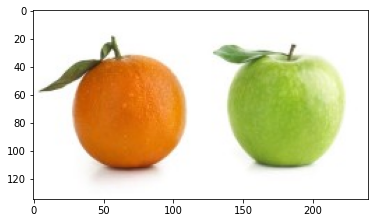

In [34]:
# showing image
plt.imshow(img)
plt.show()

In [35]:
# converting image int eh required format
converted_img=np.float32(img.reshape((-1,3)))
converted_img.shape

(32400, 3)

In [39]:
# learning the DBSCAN
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3, min_samples=100)

In [42]:
# fitting over image
db.fit(converted_img[:,:2])

DBSCAN(eps=0.3, min_samples=100)

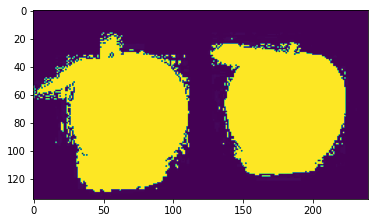

In [43]:
# showing the segmented image
plt.imshow(np.uint8(db.labels_.reshape(img.shape[:2])))
plt.show()

In [32]:
# storign teh labels
label=pd.Series(db.labels_,name='labels')
label.shape

(32400,)

In [33]:
# shwoing the unique labels
label.unique()

array([ 0,  1, -1,  2,  3,  4,  5,  6], dtype=int64)

In [34]:
# count of every label
label.value_counts()

 0    15592
-1    14544
 4      699
 1      667
 3      361
 6      228
 2      161
 5      148
Name: labels, dtype: int64

In [35]:
print('noise : 14544')
print('No od Clusters: ',len(set(label))-1)

noise : 14544
No od Clusters:  7


In [36]:
# storing all the points in a dataframe
df1=pd.DataFrame(data=converted_img,columns=['a','b','c'])
df1.head()

,a,b,c
0,255.0,255.0,255.0
1,255.0,255.0,255.0
2,255.0,255.0,255.0
3,255.0,255.0,255.0
4,255.0,255.0,255.0


In [37]:
# adding the corresponding label for each point
df2=pd.concat([df1,label],axis=1)
df2.head()

,a,b,c,labels
0,255.0,255.0,255.0,0
1,255.0,255.0,255.0,0
2,255.0,255.0,255.0,0
3,255.0,255.0,255.0,0
4,255.0,255.0,255.0,0


In [38]:
# showing the noise area
noise_area=df2[df2['labels']==-1]
noise_area.head()

,a,b,c,labels
3890,253.0,254.0,249.0,-1
3895,253.0,254.0,249.0,-1
3896,252.0,252.0,250.0,-1
4129,253.0,254.0,248.0,-1
4133,252.0,252.0,250.0,-1


In [39]:
noise_area.shape

(14544, 4)

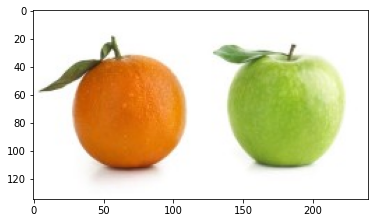

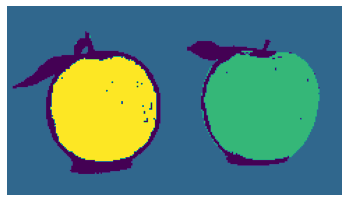

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# learning the DBSCAN
from sklearn.cluster import DBSCAN
img= cv2.imread('db_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

image=np.reshape(img, [-1, 3])
db = DBSCAN(eps=10, min_samples=100)
db.fit(image)
labels = db.labels_
plt.imshow(labels.reshape(img.shape[:2]))
plt.axis('off')
plt.savefig('dbim.jpg')

In [14]:
label=pd.Series(labels)

In [16]:
label.value_counts()

 0    20046
 1     5180
 2     4584
-1     2590
dtype: int64